In [1]:
# https://stackoverflow.com/questions/21971449/how-do-i-increase-the-cell-width-of-the-jupyter-ipython-notebook-in-my-browser
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/tmp/ipykernel_374359/327059659.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%autoreload

In [4]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [5]:
import scripts
print(scripts.__path__)
import pathlib


from scripts.common.schemas import TypeCollectionCategory
from scripts.infer.structure import DatasetFolderStructure

dataset = DatasetFolderStructure(pathlib.Path(
    "/nfs/home/bsparks/mdti4py/datasets/better-types-4-py-dataset"
))
assert dataset.dataset_root.is_dir(), f"{dataset.dataset_root} not a directory!"

print(dataset)

['/nfs/home/bsparks/mdti4py/scripts/scripts']


2023-08-23 10:56:18.422638: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-23 10:56:19.305752: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


BetterTypes4Py @ /nfs/home/bsparks/mdti4py/datasets/better-types-4-py-dataset


In [6]:
import importlib
import experiments.inferred

In [7]:
artifact_root = pathlib.Path("/nfs/home/bsparks/mdti4py/datasets")
assert artifact_root.is_dir(), f"Cannot find {artifact_root=}"

# Ground Truth

In [8]:
importlib.reload(experiments.inferred)
groundtruth = experiments.inferred.load_groundtruths(artifact_root, dataset)

/nfs/home/bsparks/mdti4py/datasets/BetterTypes4Py/kornicameister__axion/extended_ground_truth.csv: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 72.00it/s]


In [9]:
groundtruth[groundtruth["file"] == "aiosonic/pools.py"].drop(columns=["category", "qname", "repository"])

,file,qname_ssa,raw_anno,depth_limited_anno,adjusted_anno,base_anno
402,aiosonic/pools.py,CyclicQueuePool.__init__,NaN,NaN,NaN,NaN
403,aiosonic/pools.py,CyclicQueuePool.__init__.self,NaN,NaN,NaN,NaN
404,aiosonic/pools.py,CyclicQueuePool.__init__.connector,NaN,NaN,NaN,NaN
405,aiosonic/pools.py,CyclicQueuePool.__init__.pool_size,NaN,NaN,NaN,NaN
406,aiosonic/pools.py,CyclicQueuePool.__init__.connection_cls,NaN,NaN,NaN,NaN
407,aiosonic/pools.py,CyclicQueuePool.acquire,NaN,NaN,NaN,NaN
408,aiosonic/pools.py,CyclicQueuePool.acquire.self,NaN,NaN,NaN,NaN
409,aiosonic/pools.py,CyclicQueuePool.acquire._urlparsed,urllib.parse.ParseResult,urllib.parse.ParseResult,ParseResult,ParseResult
410,aiosonic/pools.py,CyclicQueuePool.release,NaN,NaN,NaN,NaN
411,aiosonic/pools.py,CyclicQueuePool.release.self,NaN,NaN,NaN,NaN


In [10]:
trivial_mask = groundtruth["adjusted_anno"].isin(["None", "Any"])
groundtruth = groundtruth[~trivial_mask]

groundtruth

,file,category,qname,qname_ssa,raw_anno,depth_limited_anno,adjusted_anno,base_anno,repository
0,instark/__init__.py,VARIABLE,__author__,__author__λ1,NaN,NaN,NaN,NaN,nubark__instark
1,instark/__init__.py,VARIABLE,__email__,__email__λ1,NaN,NaN,NaN,NaN,nubark__instark
2,instark/__init__.py,VARIABLE,__version__,__version__λ1,NaN,NaN,NaN,NaN,nubark__instark
5,tests/core/suppliers/migration/test_migration_...,VARIABLE,test_migration_supplier_methods.methods,test_migration_supplier_methods.methodsλ1,NaN,NaN,NaN,NaN,nubark__instark
6,tests/core/suppliers/migration/test_migration_...,VARIABLE,test_memory_migration_supplier_migrate.migrati...,test_memory_migration_supplier_migrate.migrati...,NaN,NaN,NaN,NaN,nubark__instark
...,...,...,...,...,...,...,...,...,...
1907,examples/petstore/api/__init__.py,CALLABLE_PARAMETER,find_pet.id,find_pet.id,builtins.int,builtins.int,int,int,kornicameister__axion
1908,examples/petstore/api/__init__.py,CALLABLE_RETURN,delete_pet,delete_pet,axion.pipeline.Response,axion.pipeline.Response,Response,Response,kornicameister__axion
1909,examples/petstore/api/__init__.py,CALLABLE_PARAMETER,delete_pet.id,delete_pet.id,builtins.int,builtins.int,int,int,kornicameister__axion
1910,examples/petstore/api/__init__.py,CALLABLE_RETURN,new_pet,new_pet,axion.pipeline.Response,axion.pipeline.Response,Response,Response,kornicameister__axion


In [11]:
groundtruth[groundtruth["file"] == "aiosonic/pools.py"].drop(columns=["category", "qname", "repository"])

,file,qname_ssa,raw_anno,depth_limited_anno,adjusted_anno,base_anno
402,aiosonic/pools.py,CyclicQueuePool.__init__,NaN,NaN,NaN,NaN
403,aiosonic/pools.py,CyclicQueuePool.__init__.self,NaN,NaN,NaN,NaN
404,aiosonic/pools.py,CyclicQueuePool.__init__.connector,NaN,NaN,NaN,NaN
405,aiosonic/pools.py,CyclicQueuePool.__init__.pool_size,NaN,NaN,NaN,NaN
406,aiosonic/pools.py,CyclicQueuePool.__init__.connection_cls,NaN,NaN,NaN,NaN
407,aiosonic/pools.py,CyclicQueuePool.acquire,NaN,NaN,NaN,NaN
408,aiosonic/pools.py,CyclicQueuePool.acquire.self,NaN,NaN,NaN,NaN
409,aiosonic/pools.py,CyclicQueuePool.acquire._urlparsed,urllib.parse.ParseResult,urllib.parse.ParseResult,ParseResult,ParseResult
410,aiosonic/pools.py,CyclicQueuePool.release,NaN,NaN,NaN,NaN
411,aiosonic/pools.py,CyclicQueuePool.release.self,NaN,NaN,NaN,NaN


In [12]:
print("=== Label Counts === ")
print(f"{groundtruth.raw_anno.notna().sum()=}, {groundtruth.adjusted_anno.notna().sum()=}, {groundtruth.base_anno.notna().sum()=}")

=== Label Counts === 
groundtruth.raw_anno.notna().sum()=15928, groundtruth.adjusted_anno.notna().sum()=15928, groundtruth.base_anno.notna().sum()=15928


In [13]:
print(groundtruth.raw_anno.value_counts())
print(groundtruth.raw_anno.value_counts(normalize=True))

raw_anno
builtins.str                                                                                           3142
builtins.int                                                                                           1158
builtins.bool                                                                                           811
tests.basilisp.helpers.CompileFn                                                                        415
typing.Optional[builtins.str]                                                                           279
                                                                                                       ... 
typing.Optional[sslyze.plugins.certificate_info.json_output.CertificateInfoScanResultAsJson]              1
typing.List[sslyze.plugins.certificate_info.json_output._CertificateDeploymentAnalysisResultAsJson]       1
typing.Optional[sslyze.plugins.certificate_info.json_output._OcspResponseAsJson]                          1
typing.List[sslyze.

In [14]:
print(groundtruth.adjusted_anno.value_counts())
print(groundtruth.adjusted_anno.value_counts(normalize=True))

adjusted_anno
str                                          3516
int                                          1303
bool                                          941
CompileFn                                     415
Dict                                          238
                                             ... 
HeartbleedScanAttemptAsJson                     1
RobotScanAttemptAsJson                          1
SessionRenegotiationScanAttemptAsJson           1
SessionResumptionSupportScanAttemptAsJson       1
TemporaryDirectory                              1
Name: count, Length: 1830, dtype: int64
adjusted_anno
str                                          0.220743
int                                          0.081806
bool                                         0.059078
CompileFn                                    0.026055
Dict                                         0.014942
                                               ...   
HeartbleedScanAttemptAsJson                  0.000063
Robo

In [15]:
print(groundtruth.base_anno.value_counts())
print(groundtruth.base_anno.value_counts(normalize=True))

base_anno
str                                3516
int                                1303
List                               1017
bool                                941
Dict                                727
                                   ... 
HtmlAnalyzer                          1
SessionRenegotiationScanAttempt       1
TvAsahiConfig                         1
NiconicoConfig                        1
BFSIterator                           1
Name: count, Length: 1133, dtype: int64
base_anno
str                                0.220743
int                                0.081806
List                               0.063850
bool                               0.059078
Dict                               0.045643
                                     ...   
HtmlAnalyzer                       0.000063
SessionRenegotiationScanAttempt    0.000063
TvAsahiConfig                      0.000063
NiconicoConfig                     0.000063
BFSIterator                        0.000063
Name: proportion

In [16]:
groundtruth[groundtruth["file"] == "aiosonic/pools.py"]

,file,category,qname,qname_ssa,raw_anno,depth_limited_anno,adjusted_anno,base_anno,repository
402,aiosonic/pools.py,CALLABLE_RETURN,CyclicQueuePool.__init__,CyclicQueuePool.__init__,NaN,NaN,NaN,NaN,sonic182__aiosonic
403,aiosonic/pools.py,CALLABLE_PARAMETER,CyclicQueuePool.__init__.self,CyclicQueuePool.__init__.self,NaN,NaN,NaN,NaN,sonic182__aiosonic
404,aiosonic/pools.py,CALLABLE_PARAMETER,CyclicQueuePool.__init__.connector,CyclicQueuePool.__init__.connector,NaN,NaN,NaN,NaN,sonic182__aiosonic
405,aiosonic/pools.py,CALLABLE_PARAMETER,CyclicQueuePool.__init__.pool_size,CyclicQueuePool.__init__.pool_size,NaN,NaN,NaN,NaN,sonic182__aiosonic
406,aiosonic/pools.py,CALLABLE_PARAMETER,CyclicQueuePool.__init__.connection_cls,CyclicQueuePool.__init__.connection_cls,NaN,NaN,NaN,NaN,sonic182__aiosonic
407,aiosonic/pools.py,CALLABLE_RETURN,CyclicQueuePool.acquire,CyclicQueuePool.acquire,NaN,NaN,NaN,NaN,sonic182__aiosonic
408,aiosonic/pools.py,CALLABLE_PARAMETER,CyclicQueuePool.acquire.self,CyclicQueuePool.acquire.self,NaN,NaN,NaN,NaN,sonic182__aiosonic
409,aiosonic/pools.py,CALLABLE_PARAMETER,CyclicQueuePool.acquire._urlparsed,CyclicQueuePool.acquire._urlparsed,urllib.parse.ParseResult,urllib.parse.ParseResult,ParseResult,ParseResult,sonic182__aiosonic
410,aiosonic/pools.py,CALLABLE_RETURN,CyclicQueuePool.release,CyclicQueuePool.release,NaN,NaN,NaN,NaN,sonic182__aiosonic
411,aiosonic/pools.py,CALLABLE_PARAMETER,CyclicQueuePool.release.self,CyclicQueuePool.release.self,NaN,NaN,NaN,NaN,sonic182__aiosonic


In [17]:
from scripts.common.schemas import ExtendedTypeCollectionSchema

import experiments.inferred
from experiments.predictions import ubiquitous, co_occurrences

import pandera.typing as pt, pandas as pd, seaborn as sns
import importlib

import matplotlib.pyplot as plt

def adjusted_pipeline(tool: str, groundtruth: pt.DataFrame[ExtendedTypeCollectionSchema]) -> pd.DataFrame:
    importlib.reload(experiments.inferred)
    print(f"Loaded inferred")
    
    inferred = experiments.inferred.load_entire_inferred(artifact_root, dataset, tool_name=tool, task="all")
    experiments.inferred.error_if_duplicate_keys(inferred)
    print(f"No duplicate keys found")

    adjusted = experiments.inferred.typet5_adjusted_form(inferred)
    print(f"Converted to adjusted form")

    trivial_mask = groundtruth.adjusted_anno.str.endswith((".None", ".Any")) | groundtruth.adjusted_anno.isin(["None", "Any"])
    groundtruth = groundtruth[~trivial_mask]
    print("Removed trivial types from groundtruth (None and Any)")

    aligned = experiments.inferred.join_truth_to_preds(
        truth=groundtruth, 
        predictions=adjusted, 
        comparable_anno=ExtendedTypeCollectionSchema.adjusted_anno,
    )
    print(f"{aligned.shape}")
    print(f"Joined ground truth to predictions")
    
    evaluatable = experiments.inferred.evaluatable(aligned)
    assert evaluatable["gt_anno"].notna().all()
    assert evaluatable["anno"].notna().all()
    
    print(f"Reduced to evaluatable: {evaluatable.shape}")
    return evaluatable

def base_pipeline(tool: str, groundtruth: pt.DataFrame[ExtendedTypeCollectionSchema]) -> pd.DataFrame:
    importlib.reload(experiments.inferred)   
    inferred = experiments.inferred.load_entire_inferred(artifact_root, dataset, tool_name=tool, task="all")
    print(f"Loaded inferred")
    
    experiments.inferred.error_if_duplicate_keys(inferred)
    print(f"No duplicate keys found")

    adjusted = experiments.inferred.typet5_base_form(inferred)
    print(f"Converted to base form")

    trivial_mask = groundtruth.base_anno.isin(["None", "Any"])
    groundtruth = groundtruth[~trivial_mask]
    print("Removed trivial types from groundtruth (None and Any)")

    aligned = experiments.inferred.join_truth_to_preds(
        truth=groundtruth, 
        predictions=adjusted, 
        comparable_anno=ExtendedTypeCollectionSchema.base_anno,
    )
    print(f"{aligned.shape}")
    print(f"Joined ground truth to predictions")
    
    evaluatable = experiments.inferred.evaluatable(aligned)
    assert evaluatable["gt_anno"].notna().all()
    assert evaluatable["anno"].notna().all()
    
    print(f"Reduced to evaluatable: {evaluatable.shape}")
    return evaluatable

In [19]:
%matplotlib agg
importlib.reload(experiments.predictions)
thres_figs, (ax1, ax2, ax3) = plt.subplots(nrows=3)

# Type4Py

In [20]:
type4py_adjusted = adjusted_pipeline(tool="type4pyN1", groundtruth=groundtruth)

Loaded inferred


/nfs/home/bsparks/mdti4py/datasets/BetterTypes4Py/kornicameister__axion/type4pyN1/all/inferred.csv: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 143.52it/s]


No duplicate keys found


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 58215/58215 [00:00<00:00, 134323.15it/s]


Converted to adjusted form
Removed trivial types from groundtruth (None and Any)
(55945, 9)
Joined ground truth to predictions
Reduced to evaluatable: (15769, 9)


/nfs/home/bsparks/mdti4py/scripts/experiments/inferred.py:162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned["anno"] = cleaned["anno"].fillna("<MISSING>")


In [21]:
type4py_base = base_pipeline(tool="type4pyN1", groundtruth=groundtruth)

/nfs/home/bsparks/mdti4py/datasets/BetterTypes4Py/kornicameister__axion/type4pyN1/all/inferred.csv: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 147.46it/s]


Loaded inferred
No duplicate keys found


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 58215/58215 [00:00<00:00, 135180.50it/s]


Converted to base form
Removed trivial types from groundtruth (None and Any)
(55945, 9)
Joined ground truth to predictions
Reduced to evaluatable: (15769, 9)


/nfs/home/bsparks/mdti4py/scripts/experiments/inferred.py:162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned["anno"] = cleaned["anno"].fillna("<MISSING>")


In [22]:
experiments.predictions.performance(type4py_base)

=== Performance  === 
Correct Predictions Made 6935 / 15769
Accuracy 0.4397869237110787


In [23]:
experiments.predictions.performance(type4py_adjusted)

=== Performance  === 
Correct Predictions Made 6483 / 15769
Accuracy 0.4111230896061894


In [24]:
importlib.reload(experiments.predictions)
type4py_base_ubiq = experiments.predictions.ubiquitous(type4py_base)

ax1.set_title('Type4Py')
co_occurrences(type4py_base_ubiq, truth="gt_anno", pred="anno", threshold=0.06, figsize=(5, 10), ax=ax1)

6870 / 15769 ground truth labels are ubiquitous


# Typilus

In [25]:
typilus_adjusted = adjusted_pipeline(tool="typilusN1", groundtruth=groundtruth)

Loaded inferred


/nfs/home/bsparks/mdti4py/datasets/BetterTypes4Py/kornicameister__axion/typilusN1/all/inferred.csv: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 140.90it/s]


No duplicate keys found


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 58215/58215 [00:00<00:00, 109048.52it/s]


Converted to adjusted form
Removed trivial types from groundtruth (None and Any)
(55945, 9)
Joined ground truth to predictions
Reduced to evaluatable: (15769, 9)


/nfs/home/bsparks/mdti4py/scripts/experiments/inferred.py:162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned["anno"] = cleaned["anno"].fillna("<MISSING>")


In [26]:
typilus_base = base_pipeline(tool="typilusN1", groundtruth=groundtruth)

/nfs/home/bsparks/mdti4py/datasets/BetterTypes4Py/kornicameister__axion/typilusN1/all/inferred.csv: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 141.21it/s]


Loaded inferred
No duplicate keys found


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 58215/58215 [00:00<00:00, 113804.23it/s]


Converted to base form
Removed trivial types from groundtruth (None and Any)
(55945, 9)
Joined ground truth to predictions
Reduced to evaluatable: (15769, 9)


/nfs/home/bsparks/mdti4py/scripts/experiments/inferred.py:162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned["anno"] = cleaned["anno"].fillna("<MISSING>")


In [27]:
experiments.predictions.performance(typilus_adjusted)

=== Performance  === 
Correct Predictions Made 4905 / 15769
Accuracy 0.3110533324877925


In [28]:
experiments.predictions.performance(typilus_base)

=== Performance  === 
Correct Predictions Made 5688 / 15769
Accuracy 0.3607077176739172


In [29]:
typilus_base_ubiq = experiments.predictions.ubiquitous(typilus_base)

#co_occurrences(evaluatable_ubiq, truth="gt_anno", pred="anno", threshold=0.0, figsize=(30, 15), ax=ax)
ax2.set_title('Typilus')
co_occurrences(typilus_base_ubiq, truth="gt_anno", pred="anno", threshold=0.06, figsize=(5, 10), ax=ax2)

6870 / 15769 ground truth labels are ubiquitous


# TypeT5

In [30]:
from scripts.common.schemas import TypeCollectionCategory
typet5_groundtruth = groundtruth[groundtruth[ExtendedTypeCollectionSchema.category].isin(
    [TypeCollectionCategory.CALLABLE_RETURN, TypeCollectionCategory.CALLABLE_PARAMETER]
)]

typet5_base = base_pipeline(tool="TypeT5TopN1", groundtruth=typet5_groundtruth)

/nfs/home/bsparks/mdti4py/datasets/BetterTypes4Py/kornicameister__axion/TypeT5TopN1/all/inferred.csv: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 144.17it/s]


Loaded inferred
No duplicate keys found


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 58215/58215 [00:00<00:00, 197217.64it/s]


Converted to base form
Removed trivial types from groundtruth (None and Any)
(26732, 9)
Joined ground truth to predictions
Reduced to evaluatable: (12204, 9)


/nfs/home/bsparks/mdti4py/scripts/experiments/inferred.py:162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned["anno"] = cleaned["anno"].fillna("<MISSING>")


In [31]:
experiments.predictions.performance(typet5_base)

=== Performance  === 
Correct Predictions Made 7048 / 12204
Accuracy 0.5775155686660112


In [32]:
typet5_base_ubiq = experiments.predictions.ubiquitous(typet5_base)

ax3.set_title('TypeT5')
experiments.predictions.co_occurrences(
    typet5_base_ubiq, 
    truth="gt_anno", pred="anno", 
    threshold=0.06, figsize=(5, 10), ax=ax3, 
    unsupported=[TypeCollectionCategory.VARIABLE]
)

5053 / 12204 ground truth labels are ubiquitous


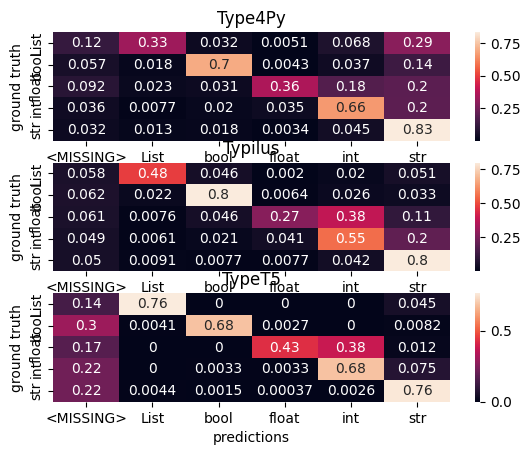

<Figure size 500x1000 with 0 Axes>

<Figure size 500x1000 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [33]:
%matplotlib inline
plt.tight_layout()
plt.show()

# Overlap: Capture per symbol diversity

In [34]:
!pip install matplotlib-venn
from matplotlib_venn import venn3

In [35]:
ignore = ["gt_anno", "topn", "method"]

common_predictions = type4py_base_ubiq.drop(columns=ignore).merge(
    typilus_base_ubiq.drop(columns=ignore), 
    how="outer", 
    on=["repository", "category", "file", "qname", "qname_ssa"], 
    suffixes=("_type4py", "_typilus")
).merge(
    typet5_base_ubiq.drop(columns=ignore).rename(columns={"anno": "anno_typet5"}),
    how="outer", 
    on=["repository", "category", "file", "qname", "qname_ssa"]
)

common_predictions = pd.merge(
    left=common_predictions,
    right=groundtruth,
    how="left",
    on=["repository", "category", "file", "qname", "qname_ssa"],
).replace("<MISSING>", pd.NA).dropna(subset=["base_anno", "anno_type4py", "anno_typilus", "anno_typet5"], how="all", axis=0)
    

common_predictions[["anno_type4py", "anno_typilus", "anno_typet5"]] = common_predictions[["anno_type4py", "anno_typilus", "anno_typet5"]]#.fillna("<MISSING>")
common_predictions[["base_anno", "anno_type4py", "anno_typilus", "anno_typet5"]]

,base_anno,anno_type4py,anno_typilus,anno_typet5
0,str,str,str,str
1,str,Set,str,str
2,str,str,str,str
3,List,str,List,List
4,str,str,str,str
...,...,...,...,...
6865,List,int,StrMap,List
6866,int,int,int,int
6867,int,int,int,int
6868,int,int,str,str


In [36]:
!pip install upsetplot
import upsetplot

In [37]:
aligned = pd.DataFrame()
for relevant in ["base_anno", "anno_type4py", "anno_typilus", "anno_typet5"]:
    aligned[relevant] = common_predictions.index.astype("string") + common_predictions[relevant]

aligned[["base_anno", "anno_type4py", "anno_typilus", "anno_typet5"]]

,base_anno,anno_type4py,anno_typilus,anno_typet5
0,0str,0str,0str,0str
1,1str,1Set,1str,1str
2,2str,2str,2str,2str
3,3List,3str,3List,3List
4,4str,4str,4str,4str
...,...,...,...,...
6865,6865List,6865int,6865StrMap,6865List
6866,6866int,6866int,6866int,6866int
6867,6867int,6867int,6867int,6867int
6868,6868int,6868int,6868str,6868str


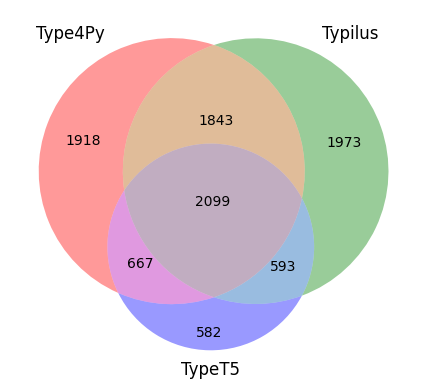

In [38]:
venn3(
    (set(aligned["anno_type4py"].tolist()), set(aligned["anno_typilus"].tolist()), set(aligned["anno_typet5"].tolist())),
    set_labels=('Type4Py', 'Typilus', 'TypeT5'),
)

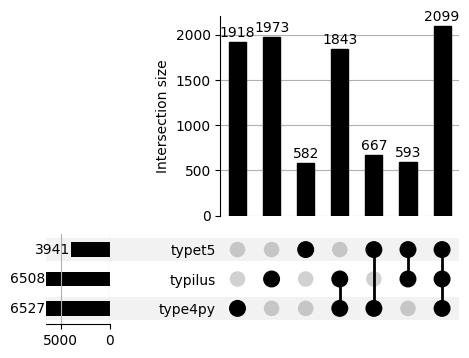

In [39]:
relevant = aligned[["base_anno", "anno_type4py", "anno_typilus", "anno_typet5"]]

gt_anno, type4py, typilus, typet5 = relevant.T.to_dict("records")

contents = {
    #"ground_truth": set(gt_anno.values()),
    "type4py": set(type4py.values()), 
    "typilus": set(typilus.values()), 
    "typet5": set(typet5.values())
}

import upsetplot
predictions_by_model = upsetplot.from_contents(contents)
predictions_by_model

upsetplot.UpSet(predictions_by_model, show_counts=True, subset_size='count')

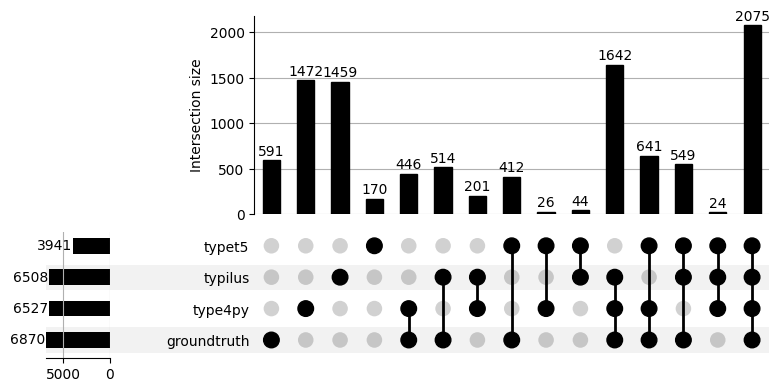

In [40]:
relevant = aligned[["base_anno", "anno_type4py", "anno_typilus", "anno_typet5"]]

gt_anno, type4py, typilus, typet5 = relevant.T.to_dict("records")

contents = {
    "groundtruth": set(gt_anno.values()),
    "type4py": set(type4py.values()), 
    "typilus": set(typilus.values()), 
    "typet5": set(typet5.values())
}

import upsetplot
predictions_by_model = upsetplot.from_contents(contents)
predictions_by_model

upsetplot.UpSet(predictions_by_model, show_counts=True, subset_size='count')

In [41]:
# Investigate types not predicted by any model:
missed_entirely = common_predictions[
    (common_predictions["anno_typet5"] != common_predictions["base_anno"]) &
    (common_predictions["anno_type4py"] != common_predictions["base_anno"]) &
    (common_predictions["anno_typilus"] != common_predictions["base_anno"])
]
missed_entirely[["repository", "file", "qname_ssa", "base_anno","anno_typet5", "anno_type4py", "anno_typilus"]]

,repository,file,qname_ssa,base_anno,anno_typet5,anno_type4py,anno_typilus
5,nubark__instark,instark/presenters/rest/helpers/format.py,parse_domain,List,<NA>,str,Move
111,flopp__GpxTrackPoster,gpxtrackposter/value_range.py,ValueRange.from_pair.value1,float,int,List,bool
114,flopp__GpxTrackPoster,gpxtrackposter/value_range.py,ValueRange.lower,float,int,str,bool
116,flopp__GpxTrackPoster,gpxtrackposter/value_range.py,ValueRange.diameter,float,int,str,int
120,flopp__GpxTrackPoster,gpxtrackposter/value_range.py,ValueRange.interpolate,float,int,str,int
...,...,...,...,...,...,...,...
6787,kornicameister__axion,tests/test_handler_analysis_path_query_arg.py,test_signature_mismatch_bad_type.foo.page,float,NaN,int,int
6788,kornicameister__axion,tests/test_handler_analysis_path_query_arg.py,test_signature_mismatch_bad_type.foo.include_e...,bool,NaN,int,List
6789,kornicameister__axion,tests/test_handler_analysis_path_query_arg.py,test_signature_all_bad_type.foo.id,float,NaN,int,str
6792,kornicameister__axion,tests/test_handler_analysis_path_query_arg.py,test_signature_match.test_handler.page,float,NaN,bool,int


In [42]:
missed_entirely["base_anno"].value_counts()

base_anno
List     221
int      182
str       86
bool      52
float     50
Name: count, dtype: int64

In [46]:
for anno in ["type4py", "typilus", "typet5"]:
    print(missed_entirely[["base_anno", f"anno_{anno}"]].value_counts())

base_anno  anno_type4py          
int        str                       126
List       str                        91
bool       str                        22
str        int                        20
float      int                        17
List       int                        17
           Dict                       11
float      str                        11
str        List                        8
int        float                       8
List       bool                        7
float      Money                       7
bool       Type                        6
           int                         6
str        float                       5
int        bool                        4
bool       List                        4
int        Tuple                       3
bool       Dict                        3
str        bool                        3
int        List                        2
float      bool                        2
str        Dict                        2
int        Type        